<a href="https://colab.research.google.com/github/Elizag14/analisenetflixcompython/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Conhecendo melhor nossos dados e preparando para a análise.

In [4]:
df = pd.read_csv('ViewingActivity.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Eliza,2022-02-02 22:24:45,00:30:14,NaN,Neymar: O Caos Perfeito: Minissérie: O Pai tá ...,NaN,LG 2019 RTK K5Lp Standard UHD TV Smart TV,00:30:18,00:30:18,BR (Brazil)
1,Eliza,2022-02-02 22:08:45,00:15:55,Autoplayed: user action: User_Interaction;,Neymar: O Caos Perfeito: Minissérie: Neymar do...,NaN,LG 2019 RTK K5Lp Standard UHD TV Smart TV,00:55:56,00:55:56,BR (Brazil)
2,Eliza,2022-01-31 23:41:38,00:00:08,Autoplayed: user action: None;,Temporada 1 (Trailer): Soy Georgina,TRAILER,Netflix Windows App - Cadmium Windows Mobile,00:00:08,00:00:08,BR (Brazil)
3,Eliza,2022-01-30 17:29:11,00:39:57,Autoplayed: user action: None;,Neymar: O Caos Perfeito: Minissérie: Neymar do...,NaN,Panasonic 2017 TANBA11 TV Smart TV,00:40:01,Not latest view,BR (Brazil)
4,Eliza,2022-01-30 16:43:28,00:45:38,Autoplayed: user action: User_Interaction;,Neymar: O Caos Perfeito: Minissérie: Juninho (...,NaN,Panasonic 2017 TANBA11 TV Smart TV,00:45:38,00:45:38,BR (Brazil)


Utilizando o .info() e .shape obtemos informações sobre nossas colunas e a quantidade de linhas e colunas, respectivamente.

In [5]:
df.shape

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27419 entries, 0 to 27418
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             27419 non-null  object
 1   Start Time               27419 non-null  object
 2   Duration                 27419 non-null  object
 3   Attributes               13464 non-null  object
 4   Title                    27419 non-null  object
 5   Supplemental Video Type  2330 non-null   object
 6   Device Type              27419 non-null  object
 7   Bookmark                 27419 non-null  object
 8   Latest Bookmark          27419 non-null  object
 9   Country                  27419 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


Eliminando colunas que não são necessárias:

'Attributes', 'Supplemental Video Type',
         'Bookmark', 'Latest Bookmark', 'Country



In [6]:
df.drop(['Attributes', 'Supplemental Video Type',
         'Bookmark', 'Latest Bookmark', 'Country'], axis=1, inplace=True)
df.head()

,Profile Name,Start Time,Duration,Title,Device Type
0,Eliza,2022-02-02 22:24:45,00:30:14,Neymar: O Caos Perfeito: Minissérie: O Pai tá ...,LG 2019 RTK K5Lp Standard UHD TV Smart TV
1,Eliza,2022-02-02 22:08:45,00:15:55,Neymar: O Caos Perfeito: Minissérie: Neymar do...,LG 2019 RTK K5Lp Standard UHD TV Smart TV
2,Eliza,2022-01-31 23:41:38,00:00:08,Temporada 1 (Trailer): Soy Georgina,Netflix Windows App - Cadmium Windows Mobile
3,Eliza,2022-01-30 17:29:11,00:39:57,Neymar: O Caos Perfeito: Minissérie: Neymar do...,Panasonic 2017 TANBA11 TV Smart TV
4,Eliza,2022-01-30 16:43:28,00:45:38,Neymar: O Caos Perfeito: Minissérie: Juninho (...,Panasonic 2017 TANBA11 TV Smart TV


In [7]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type
0,Eliza,2022-02-02 22:24:45,00:30:14,Neymar: O Caos Perfeito: Minissérie: O Pai tá ...,LG 2019 RTK K5Lp Standard UHD TV Smart TV
1,Eliza,2022-02-02 22:08:45,00:15:55,Neymar: O Caos Perfeito: Minissérie: Neymar do...,LG 2019 RTK K5Lp Standard UHD TV Smart TV
2,Eliza,2022-01-31 23:41:38,00:00:08,Temporada 1 (Trailer): Soy Georgina,Netflix Windows App - Cadmium Windows Mobile
3,Eliza,2022-01-30 17:29:11,00:39:57,Neymar: O Caos Perfeito: Minissérie: Neymar do...,Panasonic 2017 TANBA11 TV Smart TV
4,Eliza,2022-01-30 16:43:28,00:45:38,Neymar: O Caos Perfeito: Minissérie: Juninho (...,Panasonic 2017 TANBA11 TV Smart TV


Verificando a classificação dos dados

In [8]:
df.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
dtype: object

Todas as  colunas são armazenadas como object, o que significa que são strings. Isso não é bom para as duas colunas relacionadas ao tempo.Vou converter essas duas colunas para trabalharmos com elas.

Converter as colunas:

*   Start_Time
*   Duration

Start_Time para Datetime (um formato de data e hora que o
Pandas pode entender e realizar cálculos)
Start_Time de UTC para nosso fuso horário local
Duration para Timedelta (um formato de duração de tempo que o Pandas podem entender e realizar cálculos)

In [9]:
from datetime import datetime

In [10]:
Start_Time = "2022-02-02 22:24:45"
Start_Time

'2022-02-02 22:24:45'

In [11]:
Start_Time= datetime.strptime(Start_Time, "%Y-%m-%d %H:%M:%S")



In [12]:
# Formata a data no formato brasileiro
data_formatada = Start_Time.strftime("%d/%m/%Y %H:%M:%S")
print(data_formatada)

02/02/2022 22:24:45


In [13]:
df.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
dtype: object

In [14]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Profile Name             object
Start Time               object
Duration        timedelta64[ns]
Title                    object
Device Type              object
dtype: object

In [15]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type
0,Eliza,2022-02-02 22:24:45,0 days 00:30:14,Neymar: O Caos Perfeito: Minissérie: O Pai tá ...,LG 2019 RTK K5Lp Standard UHD TV Smart TV
1,Eliza,2022-02-02 22:08:45,0 days 00:15:55,Neymar: O Caos Perfeito: Minissérie: Neymar do...,LG 2019 RTK K5Lp Standard UHD TV Smart TV
2,Eliza,2022-01-31 23:41:38,0 days 00:00:08,Temporada 1 (Trailer): Soy Georgina,Netflix Windows App - Cadmium Windows Mobile
3,Eliza,2022-01-30 17:29:11,0 days 00:39:57,Neymar: O Caos Perfeito: Minissérie: Neymar do...,Panasonic 2017 TANBA11 TV Smart TV
4,Eliza,2022-01-30 16:43:28,0 days 00:45:38,Neymar: O Caos Perfeito: Minissérie: Juninho (...,Panasonic 2017 TANBA11 TV Smart TV


Quero verificar quantas vezes foi dado play em cada filme/série.

In [16]:
df['Title'].value_counts()

Lucifer: Temporada 1: Piloto (Episódio 1)                               33
Vikings: Temporada 1: Ritos de passagem (Episódio 1)                    28
Os Vingadores - The Avengers                                            20
Temporada 1 (Trailer): O Rei de Porcelana                               19
A Anatomia de Grey: Temporada 1: Longa noite, longo dia (Episódio 1)    19
                                                                        ..
Os Thundermans: Temporada 1: Chamando Dr. Thunderman (Episódio 19)       1
Os Thundermans: Temporada 1: A festa do pijama (Episódio 17)             1
Os Thundermans: Temporada 1: Thundersentido (Episódio 14)                1
Os Thundermans: Temporada 1: Presidente da classe (Episódio 13)          1
Ocean Wonders                                                            1
Name: Title, Length: 14295, dtype: int64

Verifiquei que quando o filme/série tem a temporada a contagem não está correta.
Então vou separar pelo ":" para obter a contagem correta.

In [17]:
df[['Titulo','Temporada','Episodio']] = df['Title'].str.split(':',n=2, expand = True)

df.drop('Title', axis= 1, inplace = True)
df.head()

,Profile Name,Start Time,Duration,Device Type,Titulo,Temporada,Episodio
0,Eliza,2022-02-02 22:24:45,0 days 00:30:14,LG 2019 RTK K5Lp Standard UHD TV Smart TV,Neymar,O Caos Perfeito,Minissérie: O Pai tá on (Episódio 3)
1,Eliza,2022-02-02 22:08:45,0 days 00:15:55,LG 2019 RTK K5Lp Standard UHD TV Smart TV,Neymar,O Caos Perfeito,Minissérie: Neymar do Brasil (Episódio 2)
2,Eliza,2022-01-31 23:41:38,0 days 00:00:08,Netflix Windows App - Cadmium Windows Mobile,Temporada 1 (Trailer),Soy Georgina,None
3,Eliza,2022-01-30 17:29:11,0 days 00:39:57,Panasonic 2017 TANBA11 TV Smart TV,Neymar,O Caos Perfeito,Minissérie: Neymar do Brasil (Episódio 2)
4,Eliza,2022-01-30 16:43:28,0 days 00:45:38,Panasonic 2017 TANBA11 TV Smart TV,Neymar,O Caos Perfeito,Minissérie: Juninho (Episódio 1)


Separado por: Titulo, temporada, episódio.
o parametro é,
str.split  (":")
Divida as strings em torno do separador/delimitador fornecido.
n=2
Limite o número de divisões na saída.

In [18]:
df['Titulo'].value_counts()

A Anatomia de Grey                       1008
Pokémon - A Série                         440
Heartland                                 429
Vikings                                   429
The Vampire Diaries                       424
                                         ... 
The Holiday_hook_primary_16x9               1
We Are Your Friends_hook_primary_16x9       1
Four Brothers_hook_primary_16x9             1
The Truman Show_hook_primary_16x9           1
Ocean Wonders                               1
Name: Titulo, Length: 3460, dtype: int64

Refeita a contagem.
E visto que Greys Anatomi é a séria mais vista, seguida por Pokémon.
Tenho uma ideia de qual perfil mais vê esses títulos, mas irei conferir:

In [19]:
perfil_titulo = df.groupby(['Profile Name', 'Titulo']).size().reset_index(name='Contagem')
perfil_titulo



,Profile Name,Titulo,Contagem
0,Eliza,(Des)encanto,20
1,Eliza,12 Macacos,1
2,Eliza,13 Reasons Why,1
3,Eliza,13º Distrito,1
4,Eliza,18 Presentes,1
...,...,...,...
4536,Sala,Ánimas,3
4537,Sala,Árvore de Sangue,1
4538,Sala,É o Bicho!,1
4539,Sala,Órbita 9,2


In [20]:
perfil_titulo_mais_assistido = perfil_titulo.loc[perfil_titulo.groupby('Profile Name')['Contagem'].idxmax()]

# Isso dará a você os títulos mais assistidos para cada perfil.
print(perfil_titulo_mais_assistido)


     Profile Name              Titulo  Contagem
92          Eliza  Brooklyn Nine-Nine       283
1598        Fabio       Modern Family       239
2736         Kids   Pokémon - A Série       434
2821         Rony  A Anatomia de Grey       592
3540         Sala  A Anatomia de Grey       408


In [21]:
# Agora, ordenei por contagem de maior a menor
perfil_titulo_mais_assistido = perfil_titulo_mais_assistido.sort_values(by='Contagem', ascending=False)

print(perfil_titulo_mais_assistido)


     Profile Name              Titulo  Contagem
2821         Rony  A Anatomia de Grey       592
2736         Kids   Pokémon - A Série       434
3540         Sala  A Anatomia de Grey       408
92          Eliza  Brooklyn Nine-Nine       283
1598        Fabio       Modern Family       239


Exatamente como previa:
Rony - Assiste Grey's anatomy

*   Rony - Assiste Grey's anatomy
*   Kids - Pokemon
*   Sala( também é um perfil do Rony) - Assiste Grey's anatomy
*   Eliza - Brooklyn Nine-Nine
*   Fábio - Modern Family


# **Análise de Dados - Pokémon - A Série**
Irei fazer uma análise mais detalhada selecionando apenas registros relacionados à série Pokémon.

Para isso irei criar um outro DataFrame somente com registros onde 'Titulo' é igual à Pokémon - A Série.

In [22]:
Pokemon = df[df['Titulo'] == 'Pokémon - A Série']
Pokemon.head()

,Profile Name,Start Time,Duration,Device Type,Titulo,Temporada,Episodio
2300,Eliza,2018-03-22 22:37:52,0 days 00:04:37,Smart TV,Pokémon - A Série,XY,XYZ: Um diamante bruto! (Episódio 30)
2301,Eliza,2018-03-22 22:37:35,0 days 00:00:02,Smart TV,Pokémon - A Série,XY,XYZ: Um diamante bruto! (Episódio 30)
2302,Eliza,2018-03-22 22:35:49,0 days 00:01:19,Smart TV,Pokémon - A Série,XY,XYZ: Um diamante bruto! (Episódio 30)
2303,Eliza,2018-03-22 22:15:53,0 days 00:19:36,Smart TV,Pokémon - A Série,XY,XYZ: Quebrando o Gelo! (Episódio 29)
3145,Eliza,2016-11-19 11:56:07,0 days 00:14:53,Smart TV,Pokémon - A Série,XY,XY: Kalos Quest: Um encontro escorregadio (Ep...


Quanto tempo meu filho passou assitindo pokemon?

In [23]:
Pokemon['Duration'].sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of 2300    0 days 00:04:37
2301    0 days 00:00:02
2302    0 days 00:01:19
2303    0 days 00:19:36
3145    0 days 00:14:53
              ...      
16500   0 days 00:03:02
16501   0 days 00:00:21
16502   0 days 00:17:04
16503   0 days 00:20:51
18471   0 days 00:00:02
Name: Duration, Length: 440, dtype: timedelta64[ns]>

Não tive o retorno que gostaria, pesquisei o comando para me trazer a quantidade de horas

In [24]:

# Converter a coluna "Duration" para um formato numérico em horas
Pokemon['Duration'] = Pokemon['Duration'].dt.total_seconds() / 3600

# Calcule a soma da coluna "Duration" em horas
soma_duration_horas = Pokemon['Duration'].sum()

# Exiba o resultado
print("Soma da coluna 'Duration' em horas:", soma_duration_horas)


Soma da coluna 'Duration' em horas: 103.37777777777777


<ipython-input-24-2ffd72fe06c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokemon['Duration'] = Pokemon['Duration'].dt.total_seconds() / 3600


Soma da coluna 'Duration' em horas: 103.37777777777777

Agora quero esse formato em dias, só para ter uma referencia.

In [25]:
total_horas = soma_duration_horas

# Converter horas em dias
total_dias = total_horas / 24

# Exibir o resultado
print("Total de horas:", total_horas)
print("Total de dias:", total_dias)


Total de horas: 103.37777777777777
Total de dias: 4.307407407407407


Esperava até mais
Agora quero ver qual dia ele mais assisti


In [26]:
# import Python's datetime module

import datetime

In [28]:
print(Pokemon.groupby('Weekdays').agg({'Start Time':'count'}))

KeyError: ignored

In [ ]:
print(Pokemon.groupby('Weekday').agg({'data_formatada':'count'}))

# Monday=0, Sunday=6
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Weekday', data=friends, color='blueviolet')
ax.set_title('pokemon assistidos por Dia da Semana', fontsize=17);

Sem sucesso, vou pedir para o chatGPT

<ipython-input-34-ff9bc1b765c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokemon['Start Time'] = pd.to_datetime(Pokemon['Start Time'])
<ipython-input-34-ff9bc1b765c3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokemon['DayOfWeek'] = Pokemon['Start Time'].dt.day_name().map(dias_da_semana)


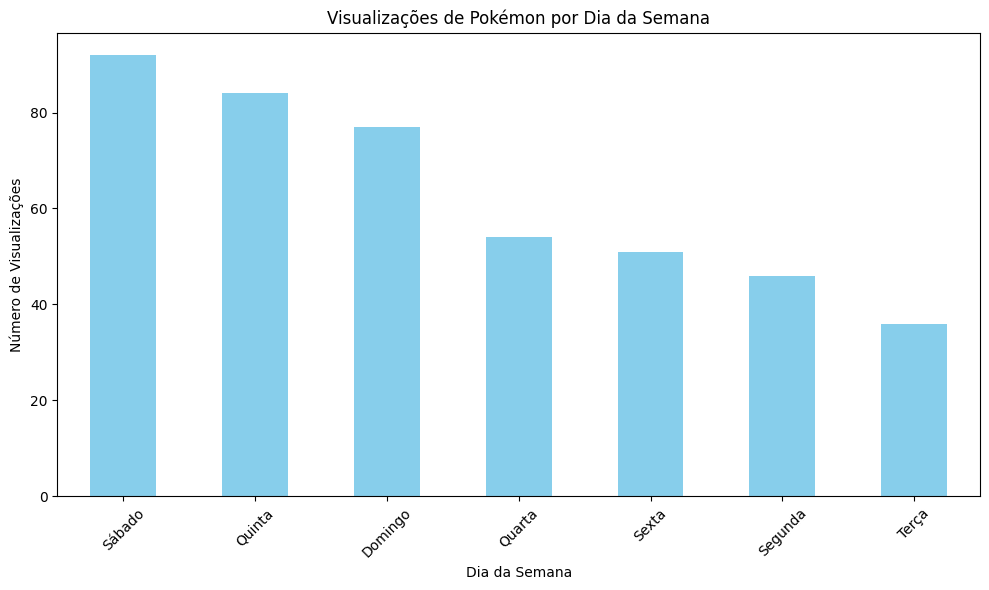

In [34]:
# Converter a coluna "Date" para o tipo datetime
Pokemon['Start Time'] = pd.to_datetime(Pokemon['Start Time'])

# Criar um dicionário para mapear os dias da semana em português
dias_da_semana = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Renomear os dias da semana com base no dicionário
Pokemon['DayOfWeek'] = Pokemon['Start Time'].dt.day_name().map(dias_da_semana)

# Contar a quantidade de visualizações por dia da semana
visualizacoes_por_dia = Pokemon['DayOfWeek'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
visualizacoes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Visualizações de Pokémon por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Visualizações')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


Quero ordenar por dia da semana, iniciando no domingo.

<ipython-input-36-050da969e171>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokemon['Start Time'] = pd.to_datetime(Pokemon['Start Time'])
<ipython-input-36-050da969e171>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokemon['DayOfWeek'] = Pokemon['Start Time'].dt.day_name().map(dias_da_semana)
<ipython-input-36-050da969e171>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

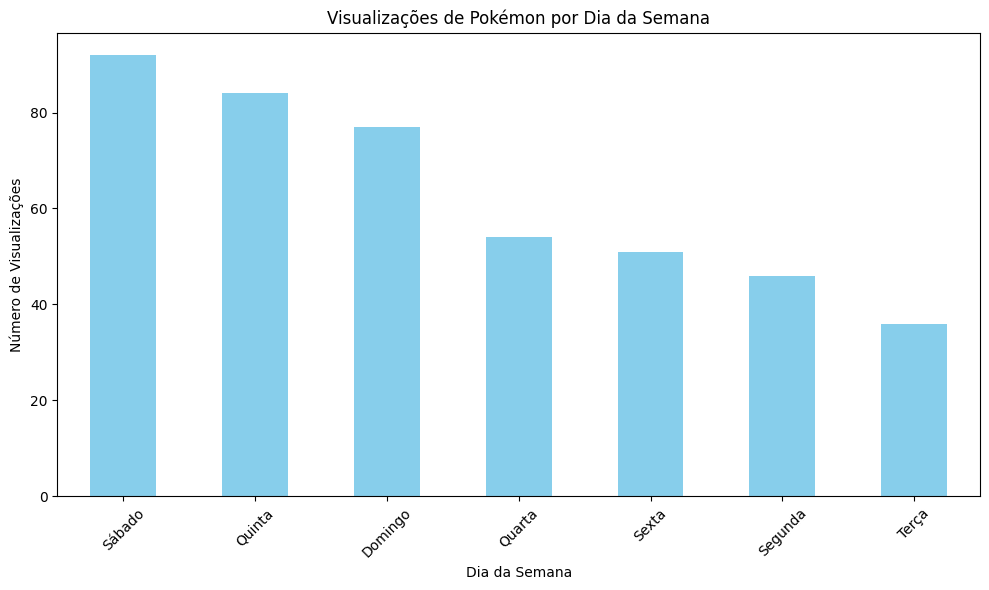

In [36]:
# Converter a coluna "Date" para o tipo datetime
Pokemon['Start Time'] = pd.to_datetime(Pokemon['Start Time'])

# Criar um dicionário para mapear os dias da semana em português
dias_da_semana = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Renomear os dias da semana com base no dicionário
Pokemon['DayOfWeek'] = Pokemon['Start Time'].dt.day_name().map(dias_da_semana)

# Criar uma coluna de ordem dos dias da semana
ordem_dias_semana = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
Pokemon['DiaDaSemanaOrdenado'] = pd.Categorical(Pokemon['DayOfWeek'], categories=ordem_dias_semana, ordered=True)

# Contar a quantidade de visualizações por dia da semana
visualizacoes_por_dia = Pokemon['DiaDaSemanaOrdenado'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
visualizacoes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Visualizações de Pokémon por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Visualizações')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


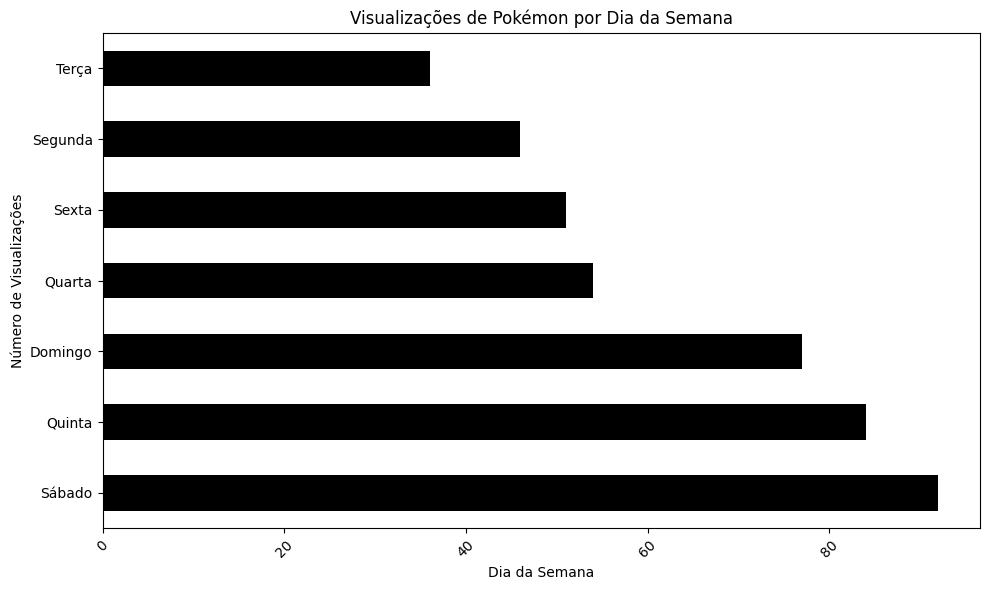

In [41]:
# Contar a quantidade de visualizações por dia da semana
visualizacoes_por_dia = Pokemon['DiaDaSemanaOrdenado'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
visualizacoes_por_dia.plot(kind='barh', color='black')
plt.title('Visualizações de Pokémon por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Visualizações')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()